### Homework 1

Prof. Melissa Ness

Yasmeen Asali 

9/13/18

### Problem 1

ADQL Code to Download Gaia data

    SELECT TOP 100 *

    SELECT TOP 100000 ra, dec, parallax, parallax_over_error, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
    FROM gaiadr2.gaia_source

    WHERE gaiadr2.gaia_source.parallax_over_error > 10

In [1]:
#load in gaia data, calculate abs mag (with g mag and parallax) and bp-rp, plot both 

In [10]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = ascii.read("gaia-parallax10p.csv")  

par_mas = data['parallax']
bp = data['phot_bp_mean_mag']
rp = data['phot_rp_mean_mag']
app_mag = data['phot_g_mean_mag']

In [4]:
abs_mag = app_mag + 5 + (5*np.log10(par_mas/1000))
color = bp - rp

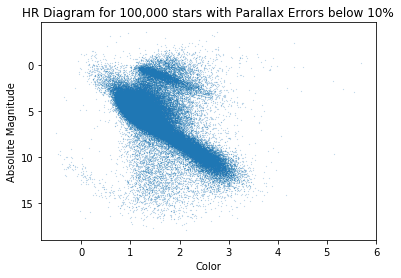

In [5]:
plt.scatter(color, abs_mag, s=.01)
plt.xlabel('Color')
plt.ylabel('Absolute Magnitude')
plt.gca().invert_yaxis()
plt.title('HR Diagram for 100,000 stars with Parallax Errors below 10%')
plt.show()

In [22]:
nearx = []
neary = []
farx = []
fary = []

par = par_mas*0.001 #convert to as
dis = 1/par #dis in pc for par is as
  
for i in range(0, 100000):    
    if dis[i] < 100:
        nearx.append(color[i])
        neary.append(abs_mag[i])
    elif 2000 < dis[i] < 3000:
        farx.append(color[i])
        fary.append(abs_mag[i])
    else: 
        continue

/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


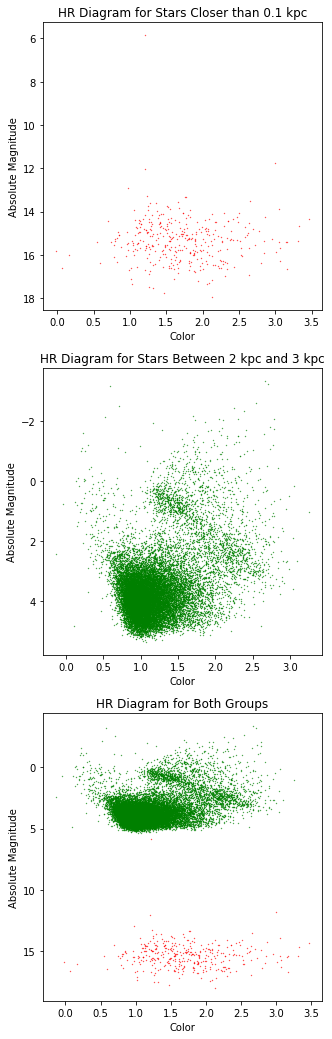

In [47]:
plt.figure(figsize = (5,18))

plt.subplot(311)
plt.scatter(nearx, neary, s=0.1, color = 'red')
plt.xlabel('Color')
plt.ylabel('Absolute Magnitude')
plt.gca().invert_yaxis()
plt.title('HR Diagram for Stars Closer than 0.1 kpc')

plt.subplot(312)
plt.scatter(farx, fary, s=0.1, color = 'green')
plt.xlabel('Color')
plt.ylabel('Absolute Magnitude')
plt.gca().invert_yaxis()
plt.title('HR Diagram for Stars Between 2 kpc and 3 kpc')

plt.subplot(313)
plt.scatter(farx, fary, s=0.1, color = 'green')
plt.scatter(nearx, neary, s=0.1, color = 'red')
plt.xlabel('Color')
plt.ylabel('Absolute Magnitude')
plt.gca().invert_yaxis()
plt.title('HR Diagram for Both Groups')

plt.savefig('modernstellar-hw1.pdf', type='pdf')

In [41]:
min(neary) # the minimum value of the absolute magnitudes for the <.1kpc distance cut

5.8575249838653232

Above we can see how the two different distance cuts return different star populations. Our dataset is parametrized by parallax errors < 10%, which means it only features stars with a highly precise parallax measurement. Stars closer to Earth are more likely to have precise parallax measurements since they will have large parallaxes (so the ratio to error is much larger). Distant stars may also have precise parallax measurements if they are sufficiently bright. Therefore, it makes sense that the 2-3 kpc cut (shown by the green data) returned more luminous stars, either massive stars on the main sequence or giants. 

The stars within 100 parsecs (show by the red data) are significantly less luminous, which is evident by the fact their absolute magnitude values are much larger. As mentioned, this may be because we are still able to measure relatively precise parallaxes for dim nearby stars because the actual parallax values are so much larger. However, it seems to imply almost all the stars in the solar neighborhood are dim, becuase if there were luminous nearby stars they would defnitely be present in this dataset since their parallax errors would be incredibly small. Also, the brightest star within 100 pcs has an absolute magnitude=5.8, which supports the idea that nearby stars are dim. Very fascinating.... 


Also, Andy and I tried the exercise again with more filters, and with a much biger sample (500000 stars) and the seperation in lumiosity was still evident. Again this implies that nearby stars are dimmer.


EDIT: After meeting with Melissa and looking into it, Andy and I determined they data might be flagged which is why it lives in the non-physical space on the graph.

### Problem 2

**Part a)**

Luminosity can be written as:

$${L} = {\sigma}{T^4}{4 \pi R^2}$$

This formula can be rearranged so luminosity, temperature, and radius are expressed as constants:

$$\frac{L}{T^4 R^2} = {\sigma}{4 \pi}$$

Since once side of the formula is a constant, this ratio of luminosity, temperature and radius should be equal for two stars. Therefore: 


$$\boxed{\frac{L_{1}}{T_{1}^4 R_{1}^2} = \frac{L_{2}}{T_{2}^4 R_{2}^2}}$$

**Part b)**

We can rearrange the above formula for Betelgeuse and solar values to find the radius of Betelgeuse:

$$ R_{Bet} = \sqrt{\frac{L_{Bet} T_\odot^4}{T_{Bet}^4 L_\odot}} {R_\odot}$$

In [8]:
import astropy.units as u

In [76]:
T = 3370 * u.K
L = 72100 * u.Lsun
def radius_eq(T, L):
    T_sun = 5800 * u.K
    ans = np.sqrt(L/u.Lsun * T_sun**4 / T**4) * u.Rsun
    return ans

Bet_rad = radius_eq(T, L)
print("The radius of Betelgeuse is:", Bet_rad)

The radius of Betelgeuse is: 795.3601317644105 solRad


### Problem 3

**Part a)**

The graph plots $\log_{10}\frac{M}{M_\odot}$ by $\log_{10}\frac{L}{L_\odot}$. Inputting the given values for mass, we can output values for the x-axis of this graph by taking its log. So for the five mass values 0.1, 1, 10, 30, and 100 ${M_\odot}$ we get the five values -1, 0, 1, 1.47, and 2. 

The next step is using the graph to find the corresponding values on the y-axis (which we then convert to L). We can clearly see the three points (-1, -3), (0, 0), and (1,  4). In order to extrapolate the other values, we can calculate an approximate slope of 7/2. Using simple algebra this gives the next two points (1.47, 5.64) and (2, 7.5). Thus the corresponding luminosity values are ${10^{-3}}$, ${1}$, ${10^4}$, ${10^{5.64}}$, and ${10^{7.5}}$.

**Part b)**

This function will output the main sequence lifetime of a star if you input the mass and luminosity in solar units. It represents the following equation:

$$ t_{MS} = \frac{Q}{4} f \frac{M}{m_{H}} \frac{1}{L}$$

In [80]:
def t_ms(mass, lum):
    Q = 4.00544e-12 * u.J
    f = 0.15
    m_H = 1.67e-24 * u.g 
    mass = mass * 2e+33 * u.g/u.Msun #convert the mass to grams 
    lum = lum * 3.826e26 * u.J / (u.s * u.Lsun) #convert the luminosity to joules / s
    time_s = (Q * f * mass) / (4 * m_H * lum)
    time_Gyr = time_s * 3.17098e-17 * u.Gyr / u.s
    return time_Gyr

In [81]:
M_01 = 0.1 * u.Msun
M_1 = 1 * u.Msun
M_10 = 10 * u.Msun
M_30 = 30 * u.Msun 
M_100 = 100 * u.Msun

L_01 = 10**-3 * u.Lsun 
L_1 = 1 * u.Lsun
L_10 = 10**4 * u.Lsun 
L_30 = 10**5.6 * u.Lsun 
L_100 = 10**7.5 * u.Lsun

In [82]:
print(t_ms(M_01, L_01))
print(t_ms(M_1, L_1))
print(t_ms(M_10, L_10))
print(t_ms(M_30, L_30))
print(t_ms(M_100, L_100))

1490.8829906939911 Gyr
14.908829906939907 Gyr
0.014908829906939907 Gyr
0.0011234786265877988 Gyr
4.71458597539663e-05 Gyr


**Part c)**

Since high mass stars are so short lived on the main sequence we can expect to see fewer of them and only see recently formed high mass stars. So regions with high mass stars may also coincide with regions of recent star formation, whereas regions of low mass stars are older and probably haven't been formed recently. With respect to the age of the universe, which is 13 Gyr, stars of solar mass and lower appear to live on the main sequence on order the age of the universe, whereas high mass stars only spend a fraction of the age of the universe on the main sequence.  

### Problem 4

**Part a)**

Using the radius equation from problem 2, we can solve for the radii of the following stars. The effective temperatures for stars of these masses are taken from google.

In [83]:
T_01 = 2900 * u.K
T_1 = 5800 * u.K
T_10 = 26000 * u.K
T_30 = 38500 * u.K

R_01 = radius_eq(T_01, L_01)
R_1 = radius_eq(T_1, L_1)
R_10 = radius_eq(T_10, L_10)
R_30 = radius_eq(T_30, L_30)

print(R_01)
print(R_1)
print(R_10)
print(R_30)

0.12649110640673517 solRad
1.0 solRad
4.976331360946745 solRad
14.319720066327335 solRad


**Part b)**

Using the following function for density, we can calculate the density for each star in units of solar density.

In [84]:
def density_eq(M, R):
    solden = (3 * u.Msun) / (4 * np.pi * u.Rsun**3) #solar density
    den =  (3 * M) / (4 * np.pi * R**3 * solden)
    return den

print(density_eq(M_01, R_01)) #given in units of solar density
print(density_eq(M_1, R_1))
print(density_eq(M_10, R_10))
print(density_eq(M_30, R_30))

49.410588440130944
1.0
0.0811469360664156
0.010216865364665526


**Part c)**

In [64]:
def avg_temp(M, R):
    T = 4e6 * (M / u.Msun) * (u.Rsun / R) * u.K
    return T

print(avg_temp(M_01, R_01))
print(avg_temp(M_1, R_1))
print(avg_temp(M_10, R_10))
print(avg_temp(M_30, R_30))

3162277.6601683795 K
4000000.0 K
8038049.940546969 K
8380052.0851087505 K


These average temperature are signifcantly larger than the effective surface temperatures that are determined observtionally. This implies that the surface temperatures of stars is lower than their internal tempertures. Likely the hottest part of the star is the core, where nuclear reactions are occuring. 

Quantitativly, we can measure a temperature difference between the average temperature and efective temperature:

In [75]:
def del_temp(M, R, T):
    diff = avg_temp(M, R) - T
    print(diff)
    
del_temp(M_01, R_01, T_01)
del_temp(M_1, R_1, T_1)
del_temp(M_10, R_10, T_10)
del_temp(M_30, R_30, T_30)

3159377.6601683795 K
3994200.0 K
8012049.940546969 K
8341552.0851087505 K


**Part d)**

To plot the log of density versus average temperature:

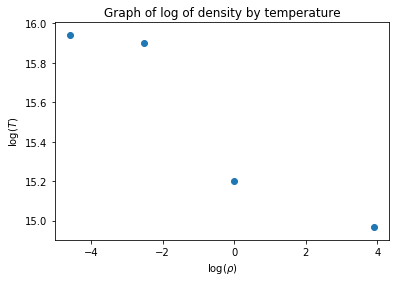

In [86]:
values = [[M_01, R_01, T_01], [M_1, R_1, T_1], [M_10, R_10, T_10], [M_30, R_30, T_30]]
logden = []
logtemp = []
for MRT in values:
    M = MRT[0]
    R = MRT[1]
    T = MRT[2]
    dens = np.log(density_eq(M, R))
    temps = np.log(avg_temp(M, R) / u.K)
    logden.append(dens)
    logtemp.append(temps)

plt.scatter(logden, logtemp)
plt.title("Graph of log of density by temperature")
plt.xlabel("log($\\rho$)")
plt.ylabel("log($T$)")
plt.show()

We can compare the above graph with the image below to get a sense of how our data compares with an ideal gas. The axis in our graph as larger, but if we extrapolate it seems like our data is pretty completely in the radiation regime, so they probably cannot be approximated as ideal gases. 

<img src="idealgas.jpg">

### Problem 5

**Part a)**

$$ m(r) = \int_{0}^{r} dm = \int_{0}^{r} {4 \pi r^2 \rho(r) dr} $$
$$ m(r) = \int_{0}^{r} {4 \pi \rho_{c} ({r^2} - \frac{r^3}{R}) dr} $$
$$ \boxed{m(r) = {4 \pi \rho_{c} ( \frac{r^3}{3} - \frac{r^4}{4R} )}} $$

**Part b)**

Use the above expression to solve for the core density ${\rho_{c}}$ by substituting the total mass ${M}$, which is equivalent to the enclosed mass at edge of the star ${m(R)}$

$$ m(R) = M = {4 \pi \rho_{c} ( \frac{R^3}{3} - \frac{R^3}{4} )} $$
$$ M = {4 \pi \rho_{c} ( \frac{R^3}{12})} $$
$$ \boxed{\rho_{c} = \frac{3M}{\pi {R^3}}} $$

**Part c)**

Gravitational binding energy can be expressed as:

$$ \Omega = - \int_{0}^{M} {\frac{G m(r)}{r} dm} $$

Since $ dm = {4 \pi r^2 \rho(r) dr} $ and $\rho{(r)} = \rho_{c} (1 - \frac{r}{R})$
we can substitute: 
$$ dm = {4 \pi r^2 \rho_{c} (1 - \frac{r}{R}) dr} $$
$$ dm = {4 \pi \rho_{c} ({r^2} - \frac{r^3}{R}) dr} $$

into the equation for gravitational binding energy. With this substitution, we also change the bounds of integrations from $ [0, M] $ to $ [0, R] $

$$ \Omega = - \int_{0}^{R} {\frac{G m(r)}{r} {4 \pi \rho_{c} ({r^2} - \frac{r^3}{R}) dr}} $$

and $m(r) = {4 \pi \rho_{c} ( \frac{r^3}{3} - \frac{r^4}{4R} )}$, so substituting that in as well gives:

$$ \Omega = - \int_{0}^{R} {G}{(4 \pi \rho_{c})^2 \frac{1}{r} (\frac{r^3}{3} - \frac{r^4}{4R}) ({r^2} - \frac{r^3}{R})} dr $$
$$ \Omega = - \int_{0}^{R} {G}{(4 \pi \rho_{c})^2(\frac{r^2}{3} - \frac{r^3}{4R}) ({r^2} - \frac{r^3}{R})} dr $$
$$ \Omega = - \int_{0}^{R} {G}{(4 \pi \rho_{c})^2(\frac{r^4}{3} - \frac{r^4}{4R} - \frac{r^5}{3R} + \frac{r^6}{4R^2})} dr $$
$$ \Omega = - \int_{0}^{R} {G}{(4 \pi \rho_{c})^2(\frac{r^4}{3} - \frac{7r^5}{12R} + \frac{r^6}{4R^2})} dr $$

Define $ x = \frac{r}{R} $ so $ dx = \frac{1}{R} dr $. This means we should substitute in $ dr = R dx $  and the bound of integration change to $ [0, 1] $

$$ \Omega = - \int_{0}^{1} {G}{(4 \pi \rho_{c})^2(\frac{x^4 R^4}{3} - \frac{7x^5R^4}{12} + \frac{x^6R^4}{4})} R dx $$
$$ \Omega = - {G}{(4 \pi \rho_{c})^2 {R^5} \int_{0}^{1} (\frac{x^4}{3} - \frac{7x^5}{12} + \frac{x^6}{4})} dx $$

Using Wolfram Alpha, the integral becomes $\frac{13}{2520}$ so we get:

$$ \Omega = - \frac{13 G(4 \pi \rho_{c})^2 R^5}{2520}$$
$$ \Omega = - \frac{26 \pi^2 G}{315}{\rho_{c}^2 R^5}$$

From part b), $ \rho_{c} = \frac{3M}{\pi {R^3}} $, so we square that to get:

$$ \Omega = - \frac{26 \pi^2 G}{315}{\frac{9M^2R^5}{\pi^2 {R^6}}}$$
$$ \Omega = - \frac{26 G M^2}{35 R}$$

So the gravitaional binding energy is: 

$$ \boxed{\Omega = - \frac{26 G M^2}{35 R}}$$

**Part d)**

The hydrostatic equilibrium equation is:

$$ \frac{dP(r)}{dr} = - \frac{Gm(r)}{r^2} \rho(r) $$

We can solve for the pressure as a function of radius:

$$ P(r) = \int_{r}^{R} \frac{-Gm(r)\rho(r)}{r^2} dr $$
$$ P(r) = \int_{r}^{R} \frac{-G}{r^2} {4 \pi \rho_{c}^2 ( \frac{r^3}{3} - \frac{r^4}{4R} )} (1 - \frac{r}{R}) dr $$
$$ P(r) = 4 \pi G \rho_{c}^2 \int_{r}^{R} \frac{r}{3} - \frac{7r^2}{12R} + \frac{r^3}{4R^2} dr $$

Define $ x = \frac{r}{R} $ so $ dx = \frac{1}{R} dr $. This means we should substitute in $ dr = R dx $  and the bound of integration change to $ [x, 1] $

$$ P(r) = 4 \pi G \rho_{c}^2 \int_{x}^{1} \frac{Rx}{3} - \frac{7Rx^2}{12} + \frac{Rx^3}{4} R dx $$
$$ P(r) = 4 \pi G \rho_{c}^2 R^2 \int_{x}^{1} \frac{x}{3} - \frac{7x^2}{12} + \frac{x^3}{4} dx $$

Substitute $ \rho_{c} = \frac{3M}{\pi {R^3}} $ to get:

$$ P(r) = \frac{36 M^2 G}{ \pi R^4} \int_{x}^{1} \frac{x}{3} - \frac{7x^2}{12} + \frac{x^3}{4} dx $$

This is equivalent to the central pressure multiplied by some function of the radius (keeping in mind x can be expressed as radius):

$$ \boxed{P(r) = P_{central} f(\frac{r}{R})} $$

**Part e) **

The virial theorem states that the totaly kinetic energy is equal to half of the gravtiational binding energy (note: gravitational potential is negative, so you need to multiply by a negative). First we will derive the kinetic energy to prove the virial theorem, then we will solve for the total internal energy which equivalent to $ E_{total} = K + \Omega = - K $.

So the kinetic energy is: 

$$ K = \frac{3}{2} \int_{0}^{M} \frac{P(r)}{\rho(r)} dm $$

Using the same substitutions for $ dm $ and $ x $ from above:

$$ K = \frac{3}{2} \int_{0}^{R} \frac{5GM^2}{4\pi R^4} (1 - \frac{4}{5}(6x^2 - 7x^3 + \frac{9x^4}{4})) 4\pi{R^2x^2} R dx $$
$$ K = \frac{6GM^2}{r} \int_{0}^{1} ( \frac{5x^2}{4} - 6x^4 + 7x^5 - \frac{9x^6}{4}) dx $$
$$ \boxed{K = \frac{13GM^2}{35R}} $$

Thus the total internal energy is:

$$ \boxed{E_{total} = - \frac{13GM^2}{35R}} $$